# StyleGAN Demonstration

## Importing the necessary packages and setting things up

In [1]:
import numpy as np
import os,sys
from collections import OrderedDict
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision

In [2]:
REPO_ROOT_DIR = '../'
sys.path.append(os.path.dirname(REPO_ROOT_DIR))
from src.generator.generator_mapping import GeneratorMapping
from src.generator.generator_synthesis import GeneratorSynthesis

### Setting up Pytorch to use the GPU

In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

## Defining the model

In [4]:
stylegan = nn.Sequential(OrderedDict([
    ('g_mapping', GeneratorMapping()),
    ('g_synthesis', GeneratorSynthesis())    
]))

### Loading the pretrained model

In [5]:
model_filename = 'karras2019stylegan-ffhq-1024x1024.for_g_all.pt'
model_path = os.path.join(REPO_ROOT_DIR, 'models', model_filename)

In [6]:
stylegan.load_state_dict(torch.load(model_path))
stylegan = stylegan.to(device)

## Input definition

In [7]:
nrows = 3
ncols = 3
nsamples = nrows*ncols

### Latent space

In [8]:
latent_space = torch.randn(nsamples, 512).to(device)

## Generating some faces

In [9]:
with torch.no_grad():
    imgs = stylegan(latent_space)
    imgs = (imgs.clamp(-1, 1)+1)/2.0
imgs = imgs.cpu()
imgs = torchvision.utils.make_grid(imgs, nrow=ncols)

## Displaying what was generated

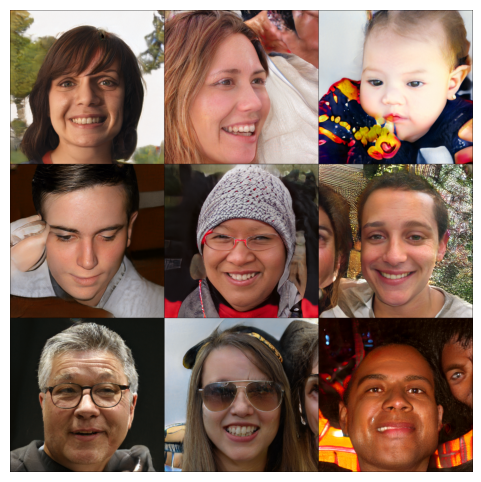

In [10]:
plt.figure(figsize=(15,6))
plt.imshow(imgs.permute(1,2,0).detach().numpy())
plt.axis('off')
plt.show()

### Generating five sets of nine images and saving them

In [11]:
fig_dir = os.path.join(REPO_ROOT_DIR, 'figures')
os.makedirs(fig_dir)
fig_name = fig_dir + 'face-set-'

In [12]:
for i in range(0,5):
    latent_space = torch.randn(nsamples, 512).to(device)
    
    with torch.no_grad():
        imgs = stylegan(latent_space)
        imgs = (imgs.clamp(-1, 1)+1)/2.0 
        
    imgs = imgs.cpu()
    imgs = torchvision.utils.make_grid(imgs, nrow=ncols)
    
    fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
    ax.imshow(imgs.permute(1,2,0).detach().numpy())
    ax.axis('off')
    fig_name = fig_name + str(i) + '.pdf'
    fig.savefig(fig_name)